In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# Reading data 
dataset = pd.read_csv("student_scores - student_scores.csv")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
x_train = np.array(dataset["Hours"]) # features 
y_train = np.array(dataset["Scores"]) # target values 

### Plotting the training examples 

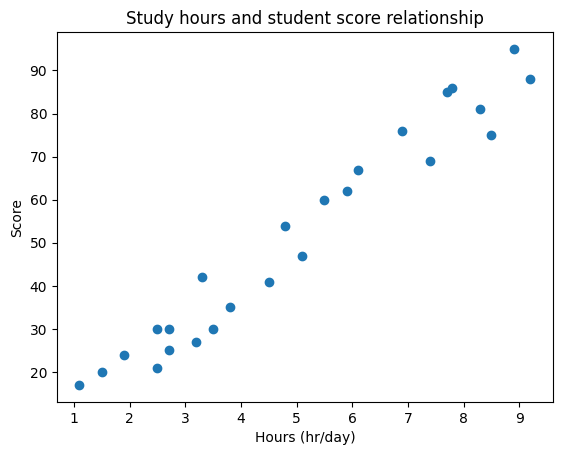

In [4]:
plt.scatter(x_train, y_train)
plt.xlabel("Hours (hr/day)")
plt.ylabel("Score")
plt.title("Study hours and student score relationship")
plt.show()

We noticed that the relationship between them is linear. Thus, we will use 
linear regression model with gradient descent to make our predictions

In [5]:
# Compute Cost Function 
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression 

    Args: 
        x (ndarray, (m,)): Data, m examples 
        y (ndarray, (m,)): Target values
        w, b (scalars): model parameter
    
    Returns: 
        cost_fn (float): The cost dunction using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    m = len(x) # number of training examples 
    cost_fn = (1 / (2*m)) * np.sum(np.square((w*x) + b - y))
    return cost_fn

In [6]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient descent for linear regression 

    Args: 
        x(ndarray, (m,)): Data, m examples 
        y(ndarray, (m,)): Target values
        w, b (scalars): model parameter
    
    Returns: 
        dj_dw (scalar): the gradient of the cost function w.r.t w parameter
        dj_db (scalar): the gradient of the cost function w.r.t b parameter
    """    
    m = len(x) # number of training examples 
    dj_dw = (1 / m) * np.sum(((w*x) + b - y) * x)
    dj_db = (1 / m) * np.sum((w*x) + b - y)

    return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w, b, alpha, num_iters, gradient_function):
    
    """"
    Performs gradient descent to fit w,b. Updates w,b by taking num_iters 
    gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w, b (scalars): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
    """
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            
 
    return w, b    #return the final values of the parameters w and b

In [8]:
w_init = 0
b_init = 0 
alpha = 0.01
iterations = 10000

w_final, b_final = gradient_descent(x_train, y_train, w_init, 
                                        b_init, alpha, iterations, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (  9.7758,  2.4837)


#### Ploting the line function generated by the model with the training set in the same plot

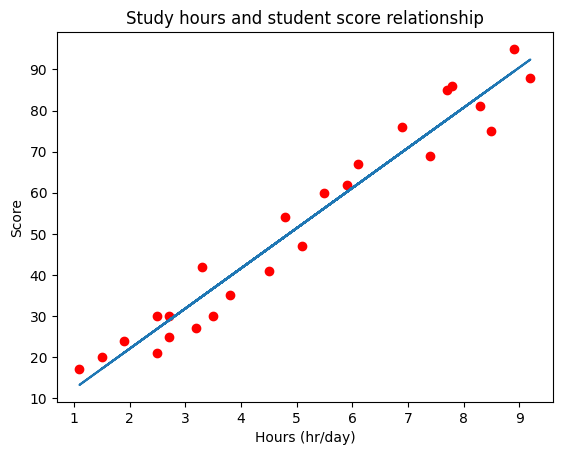

In [9]:
y_hat = w_final * x_train + b_final

plt.plot(x_train, y_hat)
plt.scatter(x_train, y_train, c='r')
plt.xlabel("Hours (hr/day)")
plt.ylabel("Score")
plt.title("Study hours and student score relationship")
plt.show()

In [12]:
x_test = 9.25
predicted_value = w_final * x_test + b_final
print(f"The predicted score if a student studies for 9.25 hrs/day is {predicted_value:8.2f}")

The predicted score if a student studies for 9.25 hrs/day is    92.91
